In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ライブラリのインポート

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# データの読み込み

In [70]:
train = pd.read_csv('/content/drive/MyDrive/pm/data/input/train.csv')
test = pd.read_csv('/content/drive/MyDrive/pm/data/input/test.csv')

df = pd.read_csv('/content/drive/MyDrive/pm/data/processed/processed_df.csv')

In [71]:
train

,id,year,month,day,Country,City,lat,lon,co_cnt,co_min,...,ws_min,ws_mid,ws_max,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var,pm25_mid
0,1,2019,1,1,Australia,Brisbane,-27.46794,153.02809,38,0.749,...,0.241,1.088,3.101,1.983,17,7.671,10.358,15.112,13.424,19.901
1,2,2019,1,1,Australia,Darwin,-12.46113,130.84185,47,2.594,...,0.828,3.473,7.396,10.411,62,21.324,23.813,24.221,2.021,13.741
2,3,2019,1,1,Australia,Melbourne,-37.81400,144.96332,17,1.190,...,0.000,2.107,8.089,15.719,22,10.309,13.133,15.422,6.355,25.918
3,4,2019,1,1,Australia,Newcastle,-32.92953,151.78010,63,4.586,...,0.284,0.503,3.592,2.485,116,7.146,10.685,13.344,9.417,174.370
4,5,2019,1,1,Australia,Perth,-31.95224,115.86140,47,4.689,...,0.500,0.755,3.396,1.937,93,1.091,3.277,12.272,4.109,167.063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195936,195937,2021,12,31,United States,Jacksonville,30.33218,-81.65565,12,0.694,...,2.195,2.710,6.125,3.757,12,16.774,22.679,26.058,13.252,16.150
195937,195938,2021,12,31,United States,Las Vegas,36.17497,-115.13722,14,0.528,...,1.002,2.974,6.861,8.354,12,10.432,14.741,15.827,7.078,16.895
195938,195939,2021,12,31,United States,Milwaukee,43.03890,-87.90647,171,1.975,...,0.994,1.087,2.578,0.612,26,2.049,3.531,6.686,5.286,86.299
195939,195940,2021,12,31,Vietnam,Hanoi,21.02450,105.84117,31,2.613,...,1.005,3.058,6.005,6.085,51,1.922,7.443,7.716,4.642,36.523


In [72]:
# データ型の確認
print(train.dtypes)

id                   int64
year                 int64
month                int64
day                  int64
Country             object
City                object
lat                float64
lon                float64
co_cnt               int64
co_min             float64
co_mid             float64
co_max             float64
co_var             float64
o3_cnt               int64
o3_min             float64
o3_mid             float64
o3_max             float64
o3_var             float64
so2_cnt              int64
so2_min            float64
so2_mid            float64
so2_max            float64
so2_var            float64
no2_cnt              int64
no2_min            float64
no2_mid            float64
no2_max            float64
no2_var            float64
temperature_cnt      int64
temperature_min    float64
temperature_mid    float64
temperature_max    float64
temperature_var    float64
humidity_cnt         int64
humidity_min       float64
humidity_mid       float64
humidity_max       float64
h

# 欠損値の確認

In [73]:
# 欠損値の確認
print(train.isnull().sum())
print(test.isnull().sum())

id                 0
year               0
month              0
day                0
Country            0
City               0
lat                0
lon                0
co_cnt             0
co_min             0
co_mid             0
co_max             0
co_var             0
o3_cnt             0
o3_min             0
o3_mid             0
o3_max             0
o3_var             0
so2_cnt            0
so2_min            0
so2_mid            0
so2_max            0
so2_var            0
no2_cnt            0
no2_min            0
no2_mid            0
no2_max            0
no2_var            0
temperature_cnt    0
temperature_min    0
temperature_mid    0
temperature_max    0
temperature_var    0
humidity_cnt       0
humidity_min       0
humidity_mid       0
humidity_max       0
humidity_var       0
pressure_cnt       0
pressure_min       0
pressure_mid       0
pressure_max       0
pressure_var       0
ws_cnt             0
ws_min             0
ws_mid             0
ws_max             0
ws_var       

### カラム一覧

In [74]:
print(train.columns)
print('カラム数：', len(train.columns))

Index(['id', 'year', 'month', 'day', 'Country', 'City', 'lat', 'lon', 'co_cnt',
       'co_min', 'co_mid', 'co_max', 'co_var', 'o3_cnt', 'o3_min', 'o3_mid',
       'o3_max', 'o3_var', 'so2_cnt', 'so2_min', 'so2_mid', 'so2_max',
       'so2_var', 'no2_cnt', 'no2_min', 'no2_mid', 'no2_max', 'no2_var',
       'temperature_cnt', 'temperature_min', 'temperature_mid',
       'temperature_max', 'temperature_var', 'humidity_cnt', 'humidity_min',
       'humidity_mid', 'humidity_max', 'humidity_var', 'pressure_cnt',
       'pressure_min', 'pressure_mid', 'pressure_max', 'pressure_var',
       'ws_cnt', 'ws_min', 'ws_mid', 'ws_max', 'ws_var', 'dew_cnt', 'dew_min',
       'dew_mid', 'dew_max', 'dew_var', 'pm25_mid'],
      dtype='object')
カラム数： 54


### 国の一覧

In [75]:
print(train['Country'].unique())
print('学習データの国の数：', len(train['Country'].unique()))

['Australia' 'Belgium' 'Brazil' 'Canada' 'Chile' 'China' 'France'
 'Germany' 'Hungary' 'India' 'Iran' 'Israel' 'Italy' 'Japan' 'Mexico'
 'Poland' 'Russia' 'Serbia' 'South Africa' 'South Korea' 'Spain' 'Taiwan'
 'Thailand' 'Turkey' 'United Kingdom' 'United States' 'Vietnam'
 'Netherlands' 'Bosnia and Herzegovina' 'Croatia']
学習データの国の数： 30


In [76]:
print(test['Country'].unique())
print('テストデータの国の数：', len(test['Country'].unique()))

['Australia' 'Belgium' 'Bosnia and Herzegovina' 'Brazil' 'Canada' 'Chile'
 'China' 'Croatia' 'France' 'Hungary' 'India' 'Israel' 'Japan' 'Mexico'
 'Netherlands' 'Poland' 'Russia' 'Serbia' 'South Africa' 'South Korea'
 'Spain' 'Taiwan' 'Thailand' 'Turkey' 'United Kingdom' 'United States'
 'Vietnam' 'Iran' 'Germany' 'Italy']
テストデータの国の数： 30


### 都市の一覧

In [77]:
print(train['City'].unique())
print('学習データの都市の数：', len(train['City'].unique()))

['Brisbane' 'Darwin' 'Melbourne' 'Newcastle' 'Perth' 'Wollongong'
 'Antwerpen' 'Charleroi' 'Liège' 'São Paulo' 'Vitória' 'Vancouver'
 'Calama' 'Quilpué' 'Talca' 'Beijing' 'Changsha' 'Chengdu' 'Foshan'
 'Fushun' 'Fuzhou' 'Guangzhou' 'Guiyang' 'Haikou' 'Hangzhou' 'Harbin'
 'Hefei' 'Hegang' 'Jieyang' 'Jinan' 'Kunming' 'Lhasa' 'Nanchang' 'Nanjing'
 'Nanning' 'Ningbo' 'Qingdao' 'Qinhuangdao' 'Qiqihar' 'Shantou' 'Shenzhen'
 'Suzhou' 'Taiyuan' 'Xiamen' 'Xining' 'Xinxiang' 'Xi’an' 'Yinchuan'
 'Yunfu' 'Zhengzhou' 'Zhuzhou' 'Ürümqi' 'Marseille' 'Nancy' 'Nantes'
 'Strasbourg' 'Berlin' 'Hamburg' 'Budapest' 'Győr' 'Miskolc' 'Pécs'
 'Szeged' 'Bengaluru' 'Bhopal' 'Chandigarh' 'Delhi' 'Gandhinagar'
 'Hyderabad' 'Hāpur' 'Jaipur' 'Kolkata' 'Mumbai' 'Muzaffarnagar'
 'Thiruvananthapuram' 'Thrissur' 'Visakhapatnam' 'Yazd' 'Netanya'
 'Tel Aviv' 'Brescia' 'Livorno' 'Milan' 'Naples' 'Rome' 'Akita' 'Chiba'
 'Fukuoka' 'Gifu-shi' 'Hiroshima' 'Kagoshima' 'Kanazawa' 'Kobe' 'Kochi'
 'Kyoto' 'Miyazaki' 'Nagasaki' 'N

In [78]:
print(test['City'].unique())
print('テストデータの都市の数：', len(test['City'].unique()))

['Adelaide' 'Sydney' 'Brussels' 'Sarajevo' 'São José dos Campos' 'Surrey'
 'Concepción' 'Santiago' 'Changchun' 'Chongqing' 'Dongguan' 'Lanzhou'
 'Shenyang' 'Shijiazhuang' 'Wuhan' 'Wuxi' 'Xuchang' 'Rijeka' 'Paris'
 'Kecskemét' 'Ghāziābād' 'Mysore' 'Nagpur' 'Petaẖ Tiqwa' 'Matsuyama'
 'Nagoya' 'Niigata' 'Osaka' 'Cuernavaca' 'Mexico City' 'Amsterdam' 'Płock'
 'Moscow' 'Belgrade' 'Port Elizabeth' 'Daegu' 'Jeonju' 'Sejong' 'Suwon'
 'Burgos' 'Douliu' 'Tainan' 'Samut Prakan' 'Bursa' 'Trabzon' 'London'
 'Chicago' 'Fresno' 'Tucson' 'Haiphong' 'Kumamoto' 'Saitama'
 'Santa Cruz de Tenerife' 'Charlotte' 'Anyang' 'Karaj' 'Katowice' 'Málaga'
 'Adana' 'Potsdam' 'Nashik' 'Parma' 'Johannesburg']
テストデータの都市の数： 63


# スタージェスの公式

In [79]:
num_bins = int(np.floor(1+np.log2(len(df))))
print(num_bins)

18


# Cityのユニークな値をデータフレーム化する

In [80]:
city_name_array = df['City'].unique()
city_name_array

array(['Brisbane', 'Darwin', 'Melbourne', 'Newcastle', 'Perth',
       'Wollongong', 'Antwerpen', 'Charleroi', 'Liège', 'São Paulo',
       'Vitória', 'Vancouver', 'Calama', 'Quilpué', 'Talca', 'Beijing',
       'Changsha', 'Chengdu', 'Foshan', 'Fushun', 'Fuzhou', 'Guangzhou',
       'Guiyang', 'Haikou', 'Hangzhou', 'Harbin', 'Hefei', 'Hegang',
       'Jieyang', 'Jinan', 'Kunming', 'Lhasa', 'Nanchang', 'Nanjing',
       'Nanning', 'Ningbo', 'Qingdao', 'Qinhuangdao', 'Qiqihar',
       'Shantou', 'Shenzhen', 'Suzhou', 'Taiyuan', 'Xiamen', 'Xining',
       'Xinxiang', 'Xi’an', 'Yinchuan', 'Yunfu', 'Zhengzhou', 'Zhuzhou',
       'Ürümqi', 'Marseille', 'Nancy', 'Nantes', 'Strasbourg', 'Berlin',
       'Hamburg', 'Budapest', 'Győr', 'Miskolc', 'Pécs', 'Szeged',
       'Bengaluru', 'Bhopal', 'Chandigarh', 'Delhi', 'Gandhinagar',
       'Hyderabad', 'Hāpur', 'Jaipur', 'Kolkata', 'Mumbai',
       'Muzaffarnagar', 'Thiruvananthapuram', 'Thrissur', 'Visakhapatnam',
       'Yazd', 'Netanya', 'Tel 

In [81]:
city_name = pd.DataFrame({'City': city_name_array})

# CSVファイルの出力
city_name.to_csv(f'/content/drive/MyDrive/pm/data/external/city_name.csv', header=True, index=False)

In [82]:
# trainとtestに再分割
train2 = df[~df['pm25_mid'].isnull()]
test2 = df[df['pm25_mid'].isnull()]

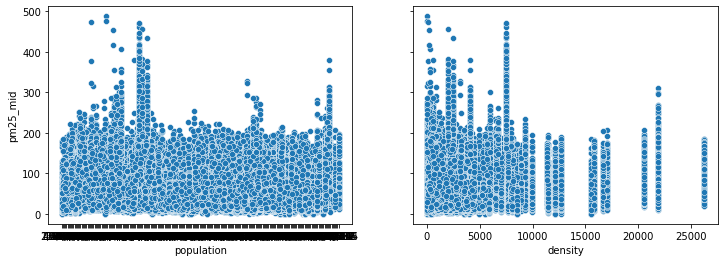

In [83]:
# figureオブジェクトとaxesオブジェクトの作成
fig, ax = plt.subplots(1, 2, figsize=(12,4), sharey=True)

# グラフの作成
sns.scatterplot(x='population', y='pm25_mid', data=train2, ax=ax[0])
sns.scatterplot(x='density', y='pm25_mid', data=train2, ax=ax[1])
plt.show()

In [84]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195941 entries, 0 to 195940
Data columns (total 64 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       195941 non-null  int64  
 1   year                     195941 non-null  int64  
 2   month                    195941 non-null  int64  
 3   day                      195941 non-null  int64  
 4   Country                  195941 non-null  object 
 5   City                     195941 non-null  object 
 6   lat                      195941 non-null  float64
 7   lon                      195941 non-null  float64
 8   co_cnt                   195941 non-null  float64
 9   co_min                   195941 non-null  float64
 10  co_mid                   195941 non-null  float64
 11  co_max                   195941 non-null  float64
 12  co_var                   195941 non-null  float64
 13  o3_cnt                   195941 non-null  float64
 14  o3_m